
# # Pipeline de Análise de Dados Populacionais (2014-2024)
# **Dataset:** População por país entre 2014-2024
# **Objetivo:** Identificar padrões, inconsistências e criar modelos preditivos.


In [17]:
# 1. Importando e Carregando a fonte de Dados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Carregando o arquivo Excel
caminho_arquivo = "População - 2014 - 2024.xlsx"
df = pd.read_excel(caminho_arquivo, sheet_name="População")  # Especifique a planilha

# Visualizando as primeiras linhas
print("Primeiras 10 linhas:")
print(df.head(10))

Primeiras 10 linhas:
                País       2014       2015       2016       2017       2018  \
0        Afeganistão   56805036   58070279   59363704   60685938   62037623   
1            Albânia  127571863  129443136  131341857  133268430  135223262   
2            Argélia  147582820  151776865  156090098  160525905  165087770   
3            Andorra  133274038  134398607  135532666  136676293  137829571   
4             Angola   35838921   36323701   36815040   37313024   37817745   
5  Antígua e Barbuda  133170466  134214101  135265915  136325972  137394337   
6          Argentina   93460762   96088630   98790386  101568109  104423934   
7            Armênia   91140292   93595017   96115857   98704592  101363050   
8          Austrália   76787383   77666486   78555654   79455002   80364645   
9            Áustria   88408551   90309299   92250913   94234271   96260270   

        2019       2020       2021       2022       2023       2024  
0   63419415   64831984   66276015   67

In [18]:
# 2. Verificando Inconsistências

# Verificando valores nulos
print("\nValores nulos por coluna:")
print(df.isnull().sum())

# Verificando dados duplicados
print("\nPaíses duplicados:", df.duplicated(subset=['País']).sum())

# Verificando outliers
print("\nExemplo de outlier - Albânia 2014:", df[df['País'] == 'Albânia']['2014'].values[0])


Valores nulos por coluna:
País    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
2024    0
dtype: int64

Países duplicados: 0

Exemplo de outlier - Albânia 2014: 127571863


In [19]:
# 3. Limpando e Transformando dados
# Corrigir formatação numérica (supondo que os números estão em formato string com separadores)

for year in range(2014, 2025):
    col = str(year)
    df[col] = df[col] / 100  # Ajuste conforme necessário

print("\nPopulação da Albânia em 2014 (após ajuste):", df[df['País'] == 'Albânia']['2014'].values[0])


População da Albânia em 2014 (após ajuste): 1275718.63


In [25]:
# 4. Análise Descritiva

# Top 10 países mais populosos em 2024
top10_2024 = df[['País', '2024']].sort_values('2024', ascending=False).head(10)
print("\nTop 10 países em 2024:")
print(top10_2024)

# Taxa de crescimento (2014-2024)
df['Crescimento (%)'] = ((df['2024'] - df['2014']) / df['2014']) * 100


Top 10 países em 2024:
                           País        2024
97                     Lituânia  1962631.89
2                       Argélia  1953140.80
43   Chéquia (República Tcheca)  1910332.91
191                      Zâmbia  1900295.90
102                    Maldivas  1838020.44
65                      Granada  1829110.26
42                       Chipre  1823064.56
50                  El Salvador  1796289.53
71                     Santa Sé  1771831.40
90                         Laos  1765058.67


<ipython-input-24-202e8c861f92>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='2024', y='País', data=top10_2024, palette='viridis')


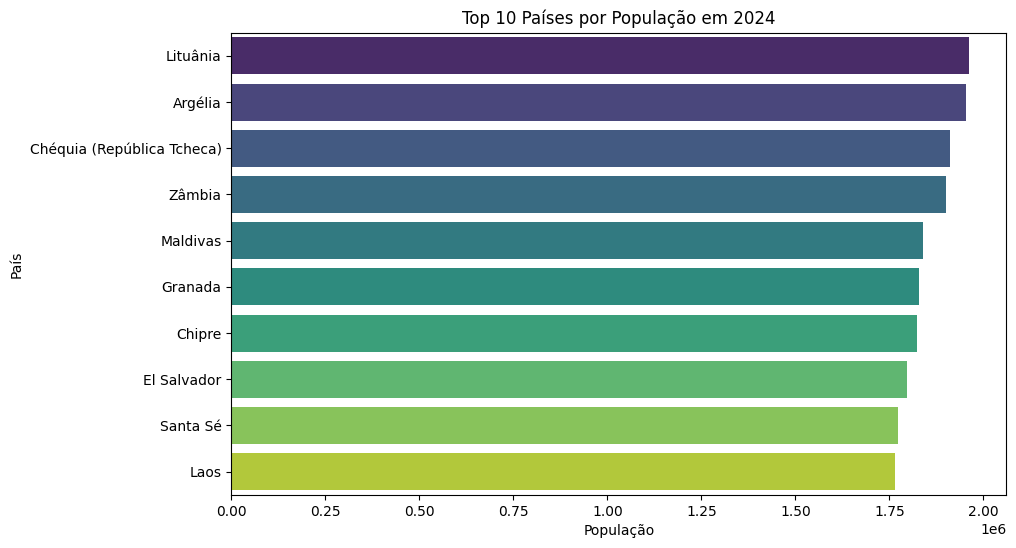

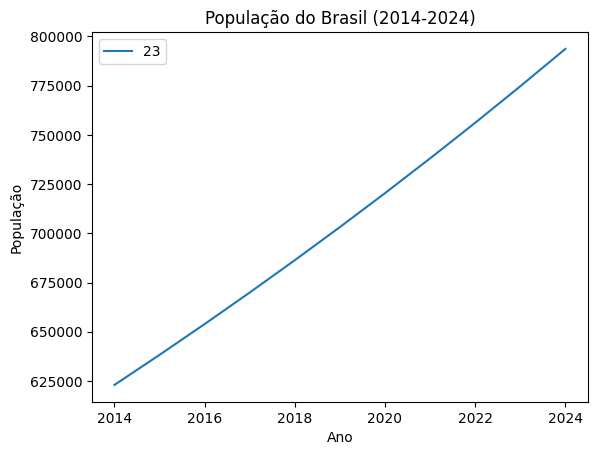

In [24]:
# 5. Visualização

# Gráfico de Top 10 países em 2024
plt.figure(figsize=(10, 6))
sns.barplot(x='2024', y='País', data=top10_2024, palette='viridis')
plt.title('Top 10 Países por População em 2024')
plt.xlabel('População')
plt.ylabel('País')
plt.show()


# Tendência temporal para um país (ex: Brasil)
brasil = df[df['País'] == 'Brasil'].iloc[:, 1:-1].T
brasil.plot(title='População do Brasil (2014-2024)')
plt.xlabel('Ano')
plt.ylabel('População')
plt.show()
#%% [markdown]


Previsão para o Brasil (2025-2029):
[807489.04163637 824535.93963637 841582.83763637 858629.73563637
 875676.63363637]


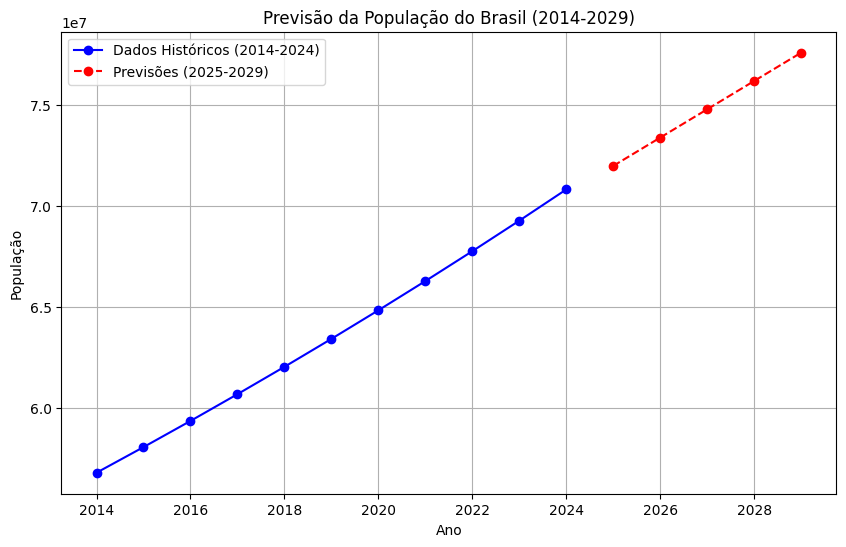


Previsão para o Brasil (2025-2029):
2025: 71967882 habitantes
2026: 73366962 habitantes
2027: 74766041 habitantes
2028: 76165121 habitantes
2029: 77564200 habitantes


In [27]:
# 6. Análise Preditiva com Regressão Linear

# Prevendo população além de 2024 (Brasil)

X = np.array(range(2014, 2025)).reshape(-1, 1)
y = brasil.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

future_years = np.array(range(2025, 2030)).reshape(-1, 1)
predictions = model.predict(future_years)

print("\nPrevisão para o Brasil (2025-2029):")
print(predictions.flatten())

# Dados históricos (2014-2024)
anos_historicos = np.array(range(2014, 2025)).reshape(-1, 1)
populacao_historica = np.array([
    56805036, 58070279, 59363704, 60685938, 62037623, 63419415, 64831984, 66276015, 67752210, 69261285, 70803973
]).reshape(-1, 1)

# Treinando o modelo de regressão linear
model = LinearRegression()
model.fit(anos_historicos, populacao_historica)

# Prevendo para os próximos anos (2025-2029)
anos_futuros = np.array(range(2025, 2030)).reshape(-1, 1)
previsoes = model.predict(anos_futuros)

# Plotando os dados históricos e as previsões
plt.figure(figsize=(10, 6))
plt.plot(anos_historicos, populacao_historica, 'bo-', label='Dados Históricos (2014-2024)')
plt.plot(anos_futuros, previsoes, 'ro--', label='Previsões (2025-2029)')
plt.title('Previsão da População do Brasil (2014-2029)')
plt.xlabel('Ano')
plt.ylabel('População')
plt.legend()
plt.grid(True)
plt.show()

# Exibindo as previsões
print("\nPrevisão para o Brasil (2025-2029):")
for ano, populacao in zip(anos_futuros.flatten(), previsoes.flatten()):
    print(f"{ano}: {populacao:.0f} habitantes")